In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import numba
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,Year,Month,Date,Time,Solar1,Solar2,Solar3
0,2012,1,1,0.5,0.0,0.0,NaN
1,2012,1,1,1.0,0.0,0.0,NaN
2,2012,1,1,1.5,0.0,0.0,NaN
3,2012,1,1,2.0,0.0,0.0,NaN
4,2012,1,1,2.5,0.0,0.0,NaN


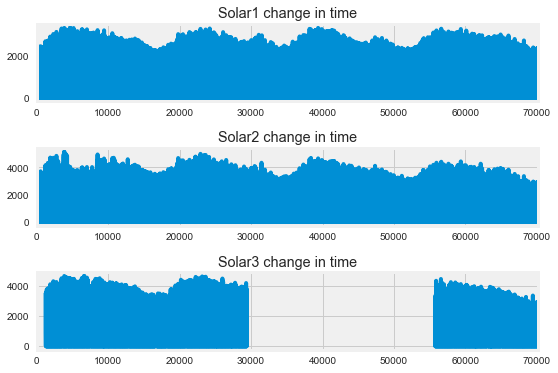

In [4]:
#全体像
plt.figure(figsize=(8,6))
plt.subplots_adjust(wspace=0.2, hspace=0.6)
for i in range(3):
    plt.subplot(3,1,(i+1))
    s = "Solar" + str(i+1)
    df[s].plot()
    plt.title(("Solar" + str(i+1) + " change in time"))
plt.show()

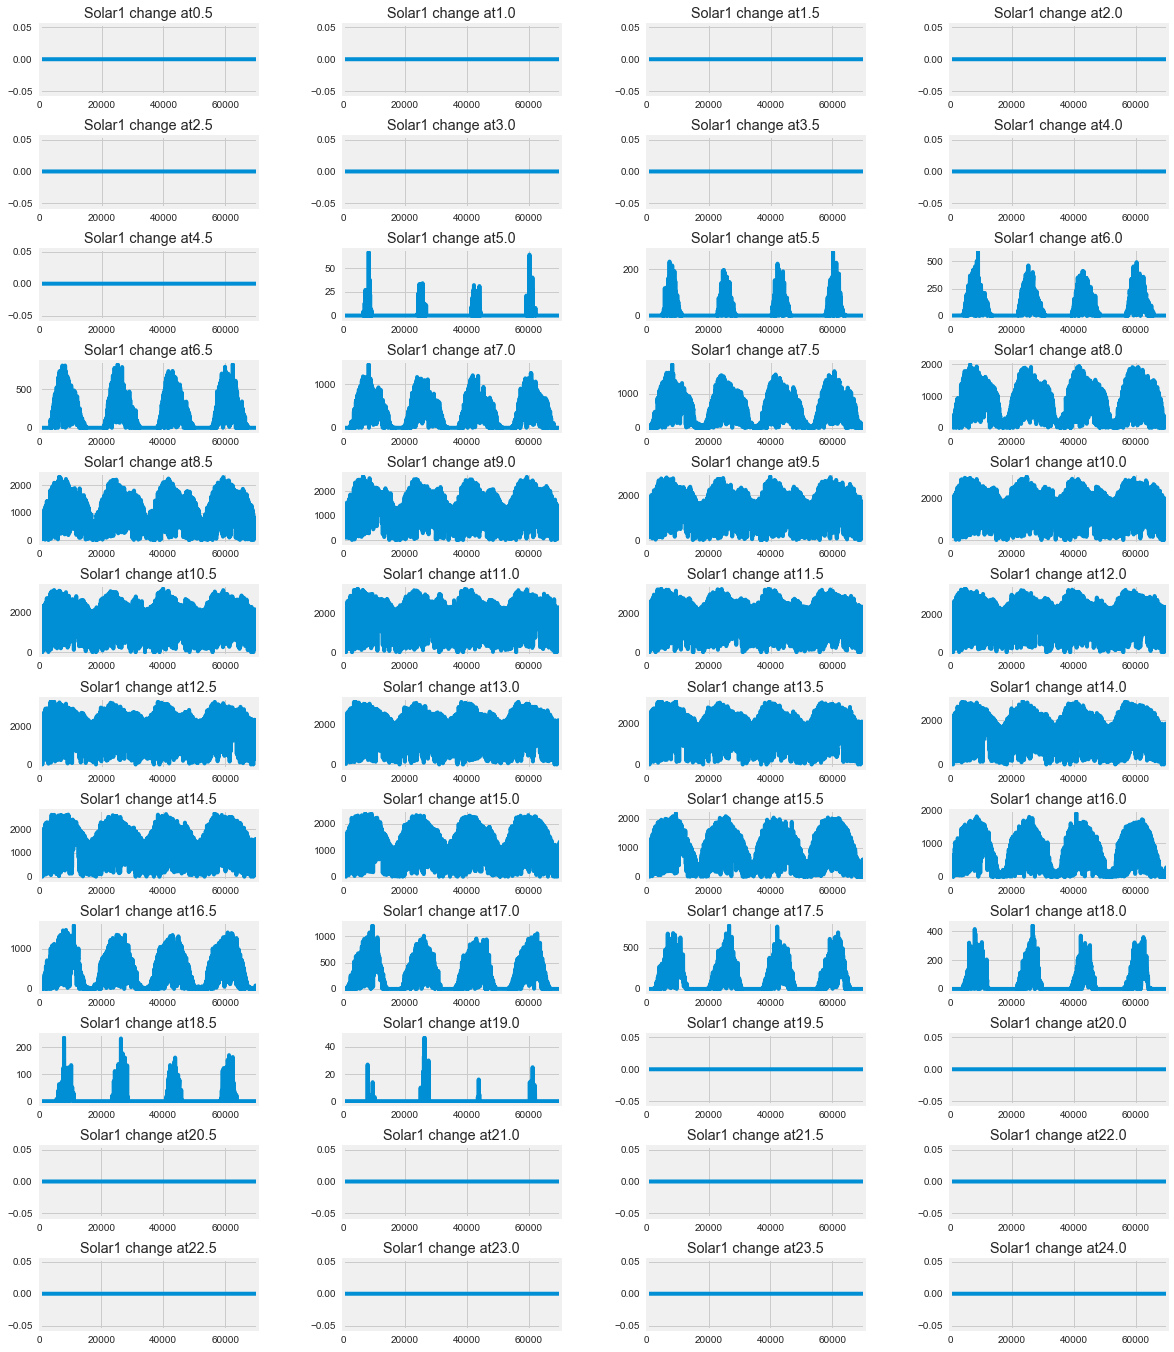

In [5]:
#時間毎
plt.figure(figsize=(18,24))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(48):
    plt.subplot(12,4,(i+1))
    a = i * 0.5 + 0.5
    df[df['Time'] == a]['Solar1'].plot()
    plt.title(("Solar1 change at" + str(a)))
plt.show()

・時間毎の違いは大きい。<br>
・日射時間の年次性のためか、年内周期性が強く存在する。<br>
・19:30 ~ 4:30 は常に０である。<br>
・5:00 ~ 7:00, 17:00~19:00はインパルス的な形状をもつ。

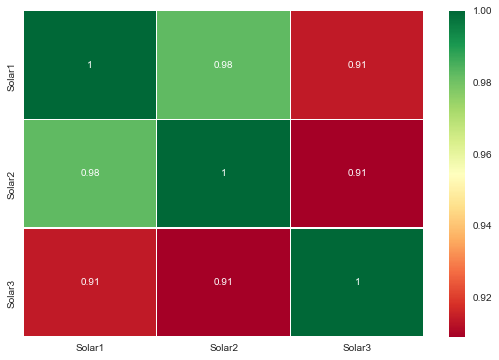

In [6]:
sns.heatmap(df[['Solar1', 'Solar2', 'Solar3']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

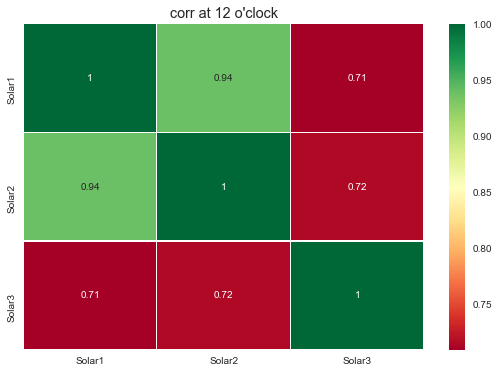

In [7]:
sns.heatmap(df[df['Time'] == 12][['Solar1', 'Solar2', 'Solar3']].corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.title("corr at 12 o'clock")
plt.show()

・各相関は非常に高い。特にSolar1と2は高く、それらと3の相関は時間帯によっては比較的に低い。

In [4]:
#平均の導出
df['_'] = 0
df['_'] = df['Solar1'].map(lambda x: 1 if x == x else 0)
df['__'] = df['Solar2'].map(lambda x: 1 if x == x else 0)
df['___'] = df['Solar3'].map(lambda x: 1 if x == x else 0)
df['Count'] = df['_'] + df['__'] + df['___']
df['_'] = df['Solar1'].map(lambda x: x if x == x else 0)
df['__'] = df['Solar2'].map(lambda x: x if x == x else 0)
df['___'] = df['Solar3'].map(lambda x: x if x == x else 0)
df['Sum'] = df['_'] + df['__'] + df['___']
df['Mean'] = df['Sum'] / df['Count']
df = df.drop(['_','__','___','Count','Sum'],axis=1)

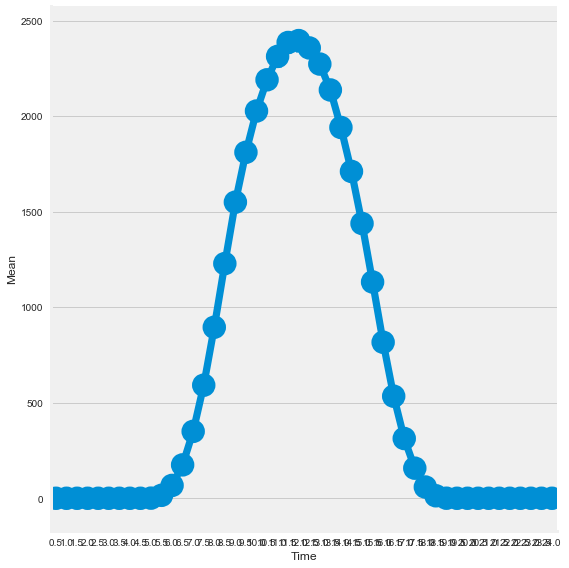

In [15]:
#各季節性の検証：日内季節性
sns.factorplot('Time', 'Mean', size=8, data=df)

綺麗。

In [17]:
pd.options.display.max_rows = None
df.groupby('Time').describe()

Date         Mean        Month       Solar1       Solar2  \
Time                                                                          
0.5  count  1461.000000  1461.000000  1461.000000  1461.000000  1456.000000   
     mean     15.729637     0.000000     6.522930     0.000000     0.000000   
     std       8.803105     0.000000     3.449884     0.000000     0.000000   
     min       1.000000     0.000000     1.000000     0.000000     0.000000   
     25%       8.000000     0.000000     4.000000     0.000000     0.000000   
     50%      16.000000     0.000000     7.000000     0.000000     0.000000   
     75%      23.000000     0.000000    10.000000     0.000000     0.000000   
     max      31.000000     0.000000    12.000000     0.000000     0.000000   
1.0  count  1461.000000  1461.000000  1461.000000  1461.000000  1456.000000   
     mean     15.729637     0.000000     6.522930     0.000000     0.000000   
     std       8.803105     0.000000     3.449884     0.000000     0.000000   
     min       1.000000     0.000000     1.000000     0.000000     0.000000   
     25%       8.000000     0.000000     4.000000     0.000000     0.000000   
     50%      16.000000     0.000000     7.000000     0.000000     0.000000   
     75%      23.000000     0.000000    10.000000     0.000000     0.000000   
     max      31.000000     0.000000    12.000000     0.000000     0.000000   
1.5  count  1461.000000  1461.000000  1461.000000  1461.000000  1456.000000   
     mean     15.729637     0.000000     6.522930     0.000000     0.000000   
     std       8.803105     0.000000     3.449884     0.000000     0.000000   
     min       1.000000     0.000000     1.000000     0.000000     0.000000   
     25%       8.000000     0.000000     4.000000     0.000000     0.000000   
     50%      16.000000     0.000000     7.000000     0.000000     0.000000   
     75%      23.000000     0.000000    10.000000     0.000000     0.000000   
     max      31.000000     0.000000    12.000000     0.000000     0.000000   
2.0  count  1461.000000  1461.000000  1461.000000  1461.000000  1456.000000   
     mean     15.729637     0.000000     6.522930     0.000000     0.000000   
     std       8.803105     0.000000     3.449884     0.000000     0.000000   
     min       1.000000     0.000000     1.000000     0.000000     0.000000   
     25%       8.000000     0.000000     4.000000     0.000000     0.000000   
     50%      16.000000     0.000000     7.000000     0.000000     0.000000   
     75%      23.000000     0.000000    10.000000     0.000000     0.000000   
     max      31.000000     0.000000    12.000000     0.000000     0.000000   
2.5  count  1461.000000  1461.000000  1461.000000  1461.000000  1456.000000   
     mean     15.729637     0.000000     6.522930     0.000000     0.000000   
     std       8.803105     0.000000     3.449884     0.000000     0.000000   
     min       1.000000     0.000000     1.000000     0.000000     0.000000   
     25%       8.000000     0.000000     4.000000     0.000000     0.000000   
     50%      16.000000     0.000000     7.000000     0.000000     0.000000   
     75%      23.000000     0.000000    10.000000     0.000000     0.000000   
     max      31.000000     0.000000    12.000000     0.000000     0.000000   
3.0  count  1461.000000  1461.000000  1461.000000  1461.000000  1456.000000   
     mean     15.729637     0.000000     6.522930     0.000000     0.000000   
     std       8.803105     0.000000     3.449884     0.000000     0.000000   
     min       1.000000     0.000000     1.000000     0.000000     0.000000   
     25%       8.000000     0.000000     4.000000     0.000000     0.000000   
     50%      16.000000     0.000000     7.000000     0.000000     0.000000   
     75%      23.000000     0.000000    10.000000     0.000000     0.000000   
     max      31.000000     0.000000    12.000000     0.000000     0.000000   
3.5  count  1461.000000  1461.000000  1461.000000  1461.000000  1456.

~4:30, 19:00~ であれば必ず0であるので、これは別にダミー変数として設定しておく。

In [5]:
df['Zero-Time'] = df['Time'].map(lambda x: 1 if (x<=4.5) or (x>=19) else 0)

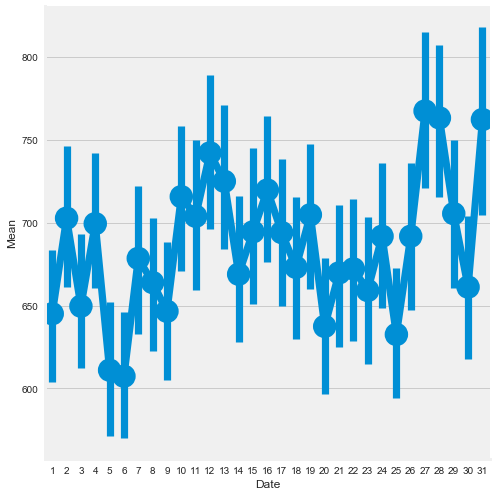

In [13]:
#月内季節性
sns.factorplot('Date', 'Mean', size=7, data=df)

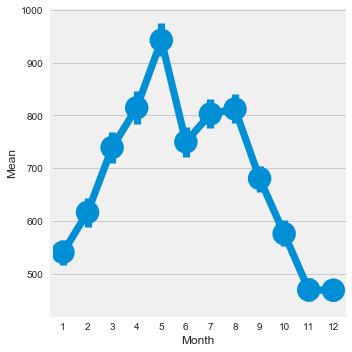

In [14]:
#年内季節性
sns.factorplot('Month', 'Mean', size = 5, data=df)

理論に沿って月内季節性は年内季節性で説明する。<br>
即ち、y_by_time を f(time in day), g(season)で説明する。<br>
さらにfはzero-time* f1(time in day)と分解すれば、f1は二次関数にほぼ等しい。

In [6]:
df.head()

,Year,Month,Date,Time,Solar1,Solar2,Solar3,Mean,Zero-Time
0,2012,1,1,0.5,0.0,0.0,NaN,0.0,1
1,2012,1,1,1.0,0.0,0.0,NaN,0.0,1
2,2012,1,1,1.5,0.0,0.0,NaN,0.0,1
3,2012,1,1,2.0,0.0,0.0,NaN,0.0,1
4,2012,1,1,2.5,0.0,0.0,NaN,0.0,1


In [9]:
def MtoD(month, year):
    
    x = int(month)
    y = int(year)
    r = 0
    
    if x >= 2:
        r = r + 31
        
        if x >= 3:
            if y == 2012:
                r = r + 29
            else:
                r = r + 28
            
            if x >= 4:
                r = r + 31
                if x >= 5:
                    r = r + 30
                    if x >= 6:
                        r = r + 31
                        if x >= 7:
                            r = r + 30
                            if x >= 8:
                                r = r + 31
                                if x >= 9:
                                    r = r + 31
                                    if x >= 10:
                                        r = r + 30
                                        if x >= 11:
                                            r = r + 31
                                            if x == 12:
                                                r = r + 30
    return r

In [13]:
df['Date-No'] = 0

M = df['Month']
D = df['Date']
Y = df['Year']

@numba.jit
def Make_DateNo(M,D,Y):
    Date_No = np.zeros(len(D))
    for i in tqdm(range(len(D))):
        Date_No[i] = MtoD(M[i],Y[i]) + D[i]
    return Date_No


df['Date-No'] = Make_DateNo(M,D,Y)
df['Date-No'] = df['Date-No'].map(lambda x: int(x))
df = df.drop(["Month", "Date"], axis=1)
df = df.ix[:, ['Year', 'Date-No', 'Time', 'Zero-Time', 'Mean','Solar1', 'Solar2', 'Solar3']]

100%|██████████| 70128/70128 [00:02<00:00, 24248.94it/s]


In [14]:
df.tail()

,Year,Date-No,Time,Zero-Time,Mean,Solar1,Solar2,Solar3
70123,2015,365,22.0,1,0.0,0.0,0.0,0.0
70124,2015,365,22.5,1,0.0,0.0,0.0,0.0
70125,2015,365,23.0,1,0.0,0.0,0.0,0.0
70126,2015,365,23.5,1,0.0,0.0,0.0,0.0
70127,2015,365,24.0,1,0.0,0.0,0.0,0.0


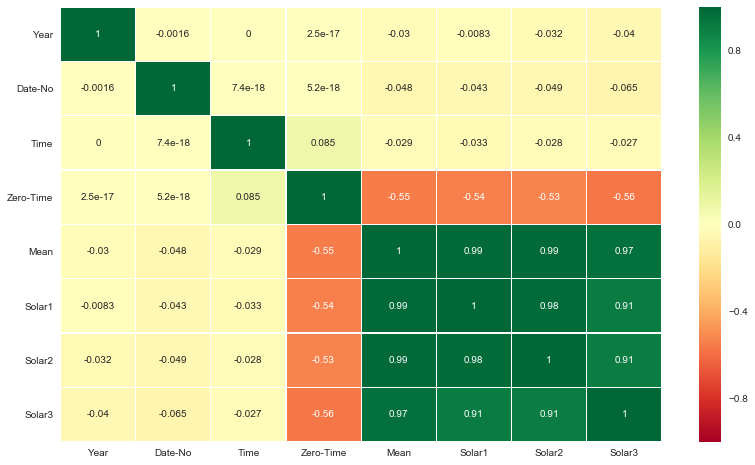

In [16]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [15]:
df.to_csv("data/train_analysis.csv", index = False,  header = True)